# HTML PARSER

## AIM

Web scraping is used to collect information from various websites programmatically and be an expert in web scrapping to harvest the data effectively.

use Python libraries requests and Beautiful Soup

steps-

   Using the browser’s developer tools, inspect the HTML structure of the target site
    
   Scrap and parse the data from the web using requests and Beautiful Soup
    
   Develop a web scraping pipeline from start to finish
    
   Build a script that fetches data from the Web and displays relevant information in your console


## Web scraping

Challenges of Web Scrapping
- Variety: Every website is different and unique
- Durability: Websites constantly change


### Worldometers Website

build a web scraper that fetches the real-time Covid-19 data from worldometer website.

web scraper will parse the HTML on the site to pick out the relevant information

we can scrape any site on the Internet that you can look at, but the difficulty of doing so depends on the site.

### Inspect Data Source 

first step is to get to know the website that you want to scrape.we should understand the site structure to extract the information that’s relevant for us.

### Inspect using Developer Tool

understand the page structure to pick what you want from the HTML response

use developer tools to understand the structure of a website.

On Windows and Linux, you can access them by clicking the top-right menu button (⋮) and selecting More Tools → Developer Tools.

Windows/Linux: Ctrl+Shift+I

Developer tools allow us to interactively explore the site’s document object model (DOM) to better understand your source.

### Install Libraries

You need the following Python Libraries

    BeautifulSoup4
    Requests
    pandas
    lxml


In [1]:
pip install BeautifulSoup4

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install Requests

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


### Import libraries 

In [5]:
from bs4 import BeautifulSoup

In [6]:
import requests

### Request Permissions

In [7]:
url = 'https://www.worldometers.info/coronavirus/'
html = requests.get(url)


<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
<!--<![endif]-->



<head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1">

    <title>COVID - Coronavirus Statistics - Worldometer</title>
    <meta name="description" content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates.">


    
	<!-- Favicon -->
	<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">
	<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">
	<link rel="apple-touch-icon" sizes="60x60" href="/favicon/apple-icon-60x60.png">
	<link rel="apple-touch-icon" sizes="72x72" href="/favicon/apple-icon-72x72.png">
	<link rel="apple-touch-icon" sizes="
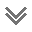

In [8]:
print(html.text)

In [9]:
soup = BeautifulSoup(html.text,'lxml')

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
  <!-- Favicon -->
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
  <link href="/favicon/apple-icon-76x
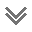

In [10]:
print(soup.prettify())

## Inspect H1 Elements

In [11]:
soup.h1

<h1>Coronavirus Cases:</h1>

In [12]:
soup.title

<title>COVID - Coronavirus Statistics - Worldometer</title>

In [13]:
soup.title.text

'COVID - Coronavirus Statistics - Worldometer'

In [14]:
header_h1 = soup.find_all(id="maincounter-wrap")
for head_h1 in header_h1:
    print(head_h1.h1.text)
    print(head_h1.div.span.text, end="\n"*2)

Coronavirus Cases:
678,525,540        

Deaths:
6,790,241

Recovered:
651,065,750



In [15]:
scrp_table = soup.find('table', id='main_table_countries_today')
scrp_table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

### Create Column List

In [16]:
headers = []
for i in scrp_table.find_all('th'):
    title = i.text
    headers.append(title)

In [17]:
headers

['#',
 'Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/\n1M pop\n',
 'Population',
 'Continent',
 '1 Caseevery X ppl',
 '1 Deathevery X ppl',
 '1 Testevery X ppl',
 'New Cases/1M pop',
 'New Deaths/1M pop',
 'Active Cases/1M pop']

In [18]:
headers

headers[10]
headers[10] = 'Tot Cases/1M pop'

headers[13]
headers[13] = 'Tests/1M pop'


In [19]:
headers

['#',
 'Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/1M pop',
 'Population',
 'Continent',
 '1 Caseevery X ppl',
 '1 Deathevery X ppl',
 '1 Testevery X ppl',
 'New Cases/1M pop',
 'New Deaths/1M pop',
 'Active Cases/1M pop']

### Create Dataframe and Fill 

In [20]:
import pandas as pd

In [21]:
scrapdata = pd.DataFrame(columns = headers)

In [22]:
for tr in scrp_table.find_all('tr')[1:]:
    row_data = tr.find_all('td')
    row = [td.text for td in row_data]
    length = len(scrapdata)
    scrapdata.loc[length] = row

In [23]:
scrapdata

#       Country,Other   TotalCases NewCases TotalDeaths NewDeaths  \
0       \nNorth America\n  124,197,357            1,607,360             
1                \nAsia\n  213,887,922  +10,658   1,534,611       +12   
2              \nEurope\n  245,776,136            2,014,485             
3       \nSouth America\n   67,915,987     +169   1,349,265        +7   
4             \nOceania\n   13,959,634               25,943             
..  ..                ...          ...      ...         ...       ...   
242                Total:   67,915,987     +169   1,349,265        +7   
243                Total:   13,959,634               25,943             
244                Total:   12,787,783              258,562             
245                Total:          721                   15             
246                Total:  678,525,540  +10,827   6,790,241       +19   

    TotalRecovered NewRecovered ActiveCases Serious,Critical  ... TotalTests  \
0      119,343,703       +2,063   3,246,294            8,032  ...              
1      198,418,561      +19,517  13,934,750           15,585  ...              
2      241,313,786       +4,373   2,447,865            6,443  ...              
3       66,106,343         +813     460,379           10,212  ...              
4       13,814,460                  119,231               71  ...              
..             ...          ...         ...              ...  ...        ...   
242     66,106,343         +813     460,379           10,212  ...              
243     13,814,460                  119,231               71  ...              
244     12,068,191                  461,030              547  ...              
245            706                        0                0  ...              
246    651,065,750      +26,766  20,669,549           40,890  ...              

    Tests/1M pop Population          Continent 1 Caseevery X ppl  \
0                                North America                \n   
1                                         Asia                \n   
2                                       Europe                \n   
3                                South America                \n   
4                            Australia/Oceania                \n   
..           ...        ...                ...               ...   
242                              South America                     
243                          Australia/Oceania                     
244                                     Africa                     
245                                                                
246                                        All                \n   

    1 Deathevery X ppl 1 Testevery X ppl New Cases/1M pop New Deaths/1M pop  \
0                                                                             
1                                                                             
2                                                                             
3                                                                             
4                                                                             
..                 ...               ...              ...               ...   
242                                                                           
243                                                                           
244                                                                           
245                                                                           
246                                                                           

    Active Cases/1M pop  
0                        
1                        
2                        
3                        
4                        
..                  ...  
242                      
243                      
244                      
245                      
246                      

[247 rows x 22 columns]

In [24]:
scrapdata.drop(scrapdata.index[0:8], inplace=True)
scrapdata.drop(scrapdata.index[228:236], inplace=True)
scrapdata.reset_index(inplace=True, drop=True)

In [25]:
# Drop “#” column
scrapdata.drop('#', inplace=True, axis=1)

In [26]:
scrapdata

Country,Other   TotalCases NewCases  \
0               USA  104,958,987            
1             India   44,684,775            
2            France   39,582,057            
3           Germany   38,002,611            
4            Brazil   36,987,682            
..              ...          ...      ...   
226    Vatican City           29            
227  Western Sahara           10            
228          Total:   12,787,783            
229          Total:          721            
230          Total:  678,525,540  +10,827   

                                   TotalDeaths NewDeaths TotalRecovered  \
0    1,142,370                                              102,261,450   
1      530,757                                               44,152,151   
2      164,712                                               39,347,955   
3      167,289                                               37,582,900   
4      698,047                                               36,106,527   
..                                         ...       ...            ...   
226                                                                  29   
227          1                                                        9   
228                                    258,562               12,068,191   
229                                         15                      706   
230                                  6,790,241       +19    651,065,750   

    NewRecovered ActiveCases Serious,Critical Tot Cases/1M pop  ...  \
0                  1,555,167            2,866          313,493  ...   
1                      1,867              N/A           31,767  ...   
2                     69,390              869          603,527  ...   
3         +3,400     252,422              N/A          453,040  ...   
4                    183,108              N/A          171,753  ...   
..           ...         ...              ...              ...  ...   
226                        0                            36,295  ...   
227                        0                                16  ...   
228                  461,030              547                   ...   
229                        0                0                   ...   
230      +26,766  20,669,549           40,890         87,048.5  ...   

        TotalTests Tests/1M pop      Population      Continent  \
0    1,162,998,821    3,473,657    334,805,269   North America   
1      917,510,608      652,275  1,406,631,776            Asia   
2      271,490,188    4,139,547     65,584,518          Europe   
3      122,332,384    1,458,359     83,883,596          Europe   
4       63,776,166      296,146    215,353,593   South America   
..             ...          ...             ...            ...   
226                                        799          Europe   
227                                    626,161          Africa   
228                                                     Africa   
229                                                              
230                                                        All   

    1 Caseevery X ppl 1 Deathevery X ppl 1 Testevery X ppl New Cases/1M pop  \
0                   3                293                 0                    
1                  31              2,650                 2                    
2                   2                398                 0                    
3                   2                501                 1                    
4                   6                309                 3                    
..                ...                ...               ...              ...   
226                28                                                         
227            62,616            626,161                                      
228                                                                           
229                                                                           
230                \n                            

## Export Dataframe to CSV

In [28]:
scrapdata.to_csv('covid_data.csv', index=False)  # Export to cs

csv_data = pd.read_csv('covid_data.csv') # Try to read csv

In [29]:
csv_data

Country,Other   TotalCases NewCases  \
0               USA  104,958,987      NaN   
1             India   44,684,775      NaN   
2            France   39,582,057      NaN   
3           Germany   38,002,611      NaN   
4            Brazil   36,987,682      NaN   
..              ...          ...      ...   
226    Vatican City           29      NaN   
227  Western Sahara           10      NaN   
228          Total:   12,787,783      NaN   
229          Total:          721      NaN   
230          Total:  678,525,540  +10,827   

                                   TotalDeaths  NewDeaths TotalRecovered  \
0    1,142,370                                        NaN    102,261,450   
1      530,757                                        NaN     44,152,151   
2      164,712                                        NaN     39,347,955   
3      167,289                                        NaN     37,582,900   
4      698,047                                        NaN     36,106,527   
..                                         ...        ...            ...   
226                                                   NaN             29   
227          1                                        NaN              9   
228                                    258,562        NaN     12,068,191   
229                                         15        NaN            706   
230                                  6,790,241       19.0    651,065,750   

    NewRecovered ActiveCases Serious,Critical Tot Cases/1M pop  ...  \
0            NaN   1,555,167            2,866          313,493  ...   
1            NaN       1,867              NaN           31,767  ...   
2            NaN      69,390              869          603,527  ...   
3         +3,400     252,422              NaN          453,040  ...   
4            NaN     183,108              NaN          171,753  ...   
..           ...         ...              ...              ...  ...   
226          NaN           0              NaN           36,295  ...   
227          NaN           0              NaN               16  ...   
228          NaN     461,030              547              NaN  ...   
229          NaN           0                0              NaN  ...   
230      +26,766  20,669,549           40,890         87,048.5  ...   

        TotalTests Tests/1M pop      Population      Continent  \
0    1,162,998,821    3,473,657    334,805,269   North America   
1      917,510,608      652,275  1,406,631,776            Asia   
2      271,490,188    4,139,547     65,584,518          Europe   
3      122,332,384    1,458,359     83,883,596          Europe   
4       63,776,166      296,146    215,353,593   South America   
..             ...          ...             ...            ...   
226            NaN          NaN            799          Europe   
227            NaN          NaN        626,161          Africa   
228            NaN          NaN             NaN         Africa   
229            NaN          NaN             NaN            NaN   
230            NaN          NaN             NaN            All   

    1 Caseevery X ppl 1 Deathevery X ppl 1 Testevery X ppl  New Cases/1M pop  \
0                   3                293               0.0               NaN   
1                  31              2,650               2.0               NaN   
2                   2                398               0.0               NaN   
3                   2                501               1.0               NaN   
4                   6                309               3.0               NaN   
..                ...                ...               ...               ...   
226                28                NaN               NaN               NaN   
227            62,616            626,161               NaN               NaN   
228                                  NaN               NaN               NaN   
229                                  NaN               NaN               NaN   
230                \n     